In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Time Forecasting

### Time Forecasting overall over years
### Relating crime_rate and unemployment rate to the forecasting model

#### Using Prophet model to forecast

In [11]:
data = pd.read_csv('../datasets/police_shootings_cleaned2.csv')

data.head()
# set date as indices
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
print(data.head())




            Unnamed: 0   age gender    armed      race     city state flee  \
date                                                                         
2015-01-02           0  47.0   male      gun     White    Aloha    OR  not   
2015-01-02           1  53.0   male      gun     Asian  Shelton    WA  not   
2015-01-03           2  23.0   male  unarmed  Hispanic  Wichita    KS  not   
2015-01-04           3  18.0   male      gun     White  Guthrie    OK  not   
2015-01-04           4  39.0   male    other  Hispanic    Evans    CO  not   

            body_camera  signs_of_mental_illness  \
date                                               
2015-01-02        False                    False   
2015-01-02        False                     True   
2015-01-03        False                    False   
2015-01-04        False                    False   
2015-01-04        False                    False   

                           police_departments_involved  
date                           

In [12]:
data['count'] = 1
datam = data.resample('M').sum()
datam = datam[['count']]
datam = datam.reset_index()
datam.columns = ['ds', 'y']
print(datam.head())


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_26900\2486982843.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datam = data.resample('M').sum()


          ds   y
0 2015-01-31  76
1 2015-02-28  77
2 2015-03-31  92
3 2015-04-30  84
4 2015-05-31  72


c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
23:26:53 - cmdstanpy - INFO - Chain [1] start processing
23:26:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


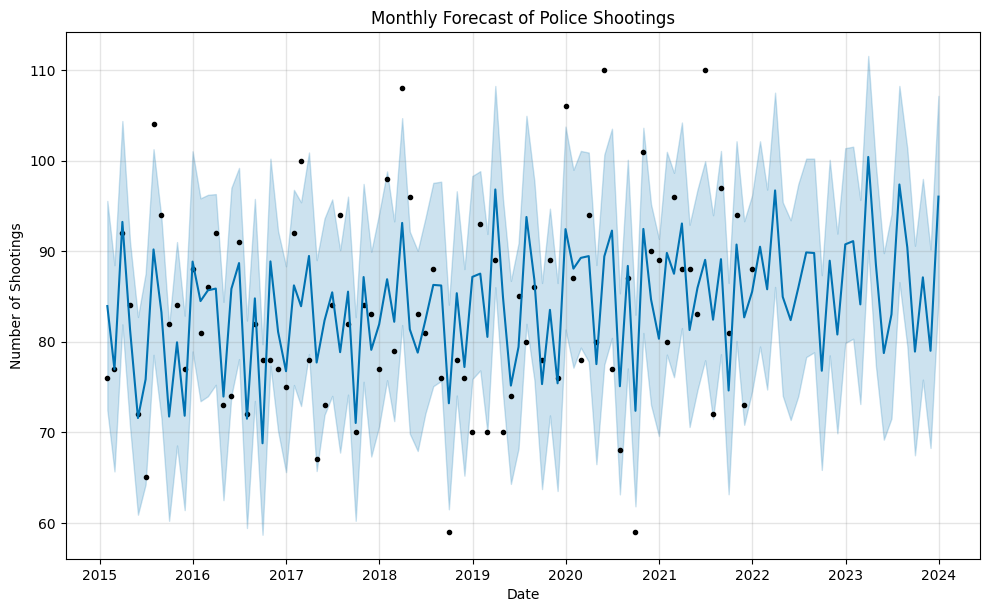

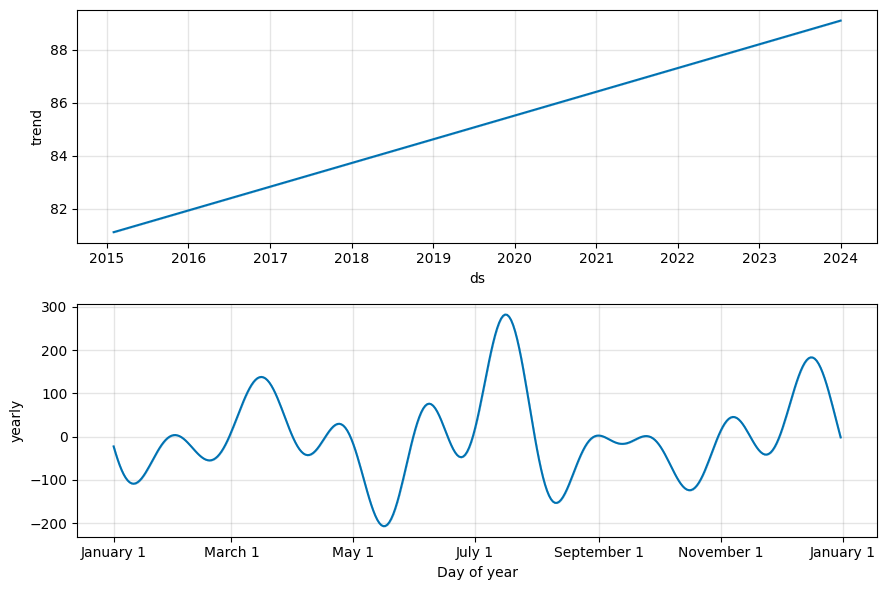

In [13]:
from prophet import Prophet

# only fit datam from 2015-2021
datam_cur = datam[datam['ds'] < '2022-01-01']

# Fit the model
model = Prophet()
model.fit(datam_cur)

# Make predictions
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Monthly Forecast of Police Shootings')
plt.xlabel('Date')
plt.ylabel('Number of Shootings')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


# save the image in time_series folder





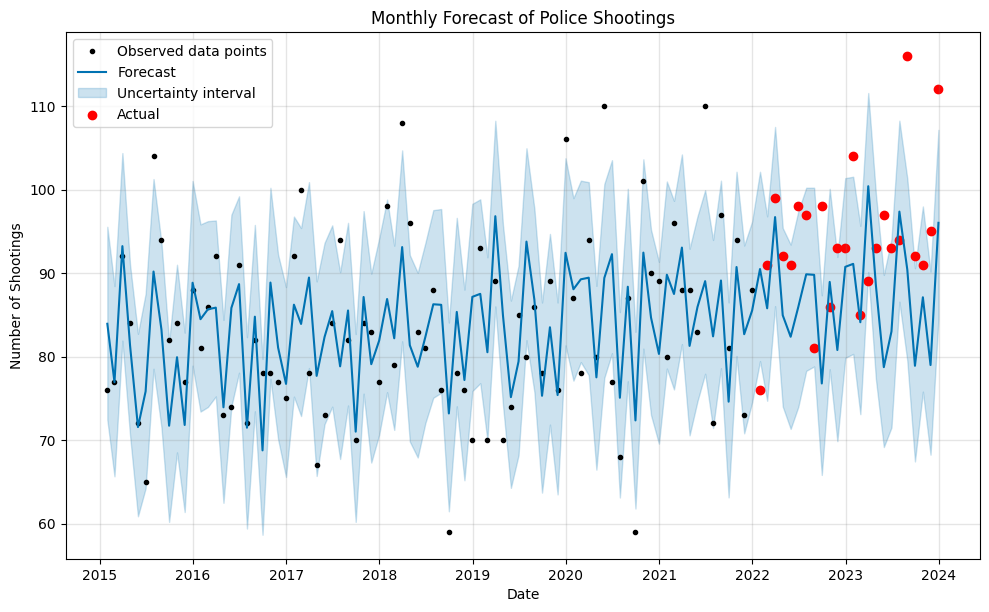

In [14]:
# plot the actual datam from 2021 to 2023 and the forecast together in the same plot

datam_fut = datam[datam['ds'] >= '2022-01-01']
datam_fut = datam_fut[datam_fut['ds'] < '2024-01-01']

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Monthly Forecast of Police Shootings')
plt.xlabel('Date')
plt.ylabel('Number of Shootings')

# Plot the actual datam as scatter plot
# plt.plot(datam_fut['ds'], datam_fut['y'], label='Actual', color='red')
plt.scatter(datam_fut['ds'], datam_fut['y'], label='Actual', color='red')
plt.legend()
plt.show()

if not os.path.exists('time_series'):
    os.makedirs('time_series')
fig1.savefig('time_series/forecast.png')



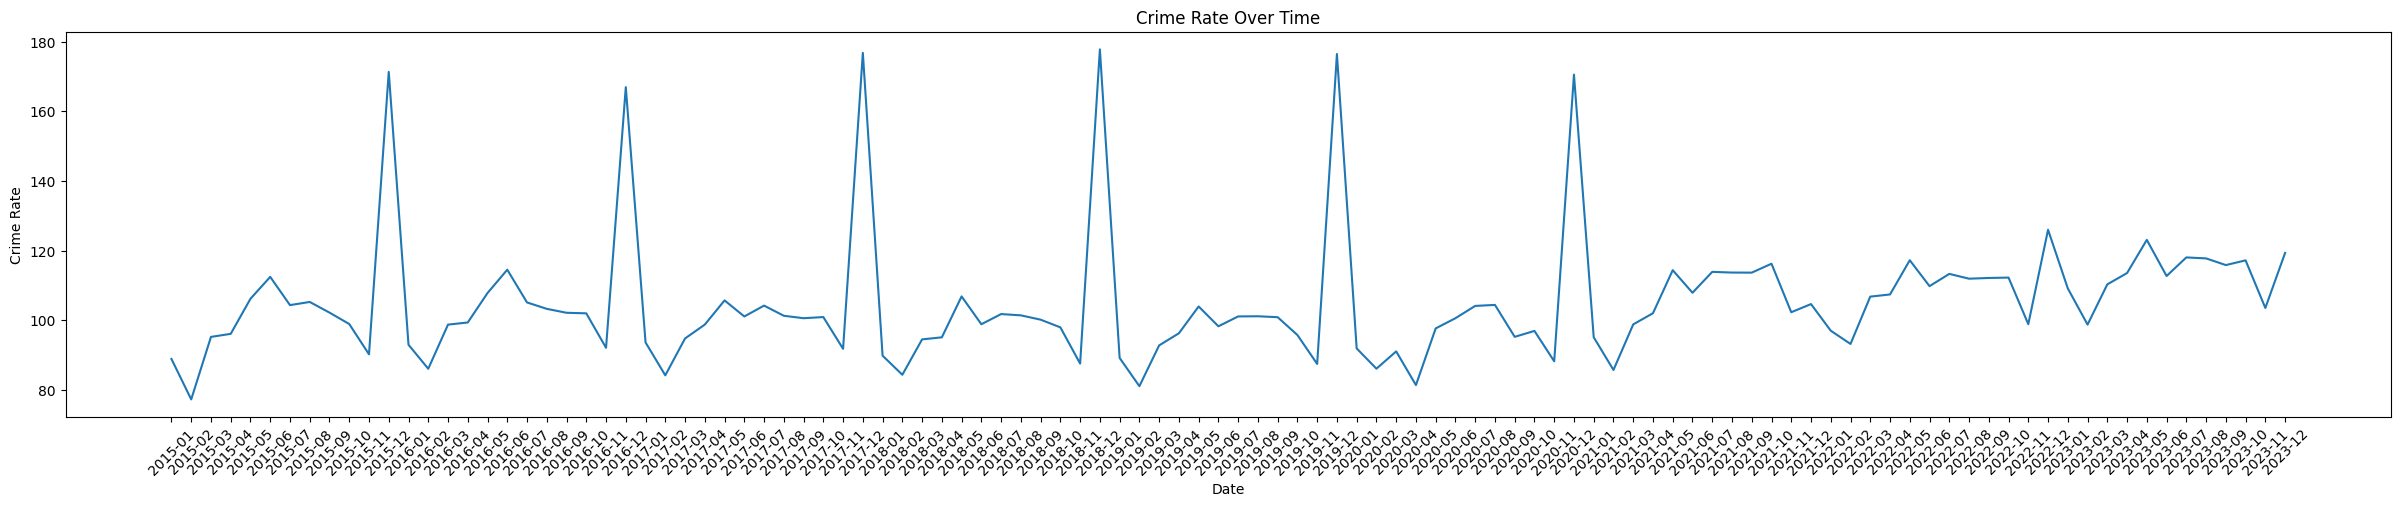

In [15]:
# plot crime rate over time

crimes_data = pd.read_csv('../datasets/crime_rates.csv')
# Standardize date format in crimes data
crimes_data_long = crimes_data.melt(id_vars=['series'], var_name='date', value_name='crime_rates')
crimes_total = crimes_data_long[crimes_data_long['series'] == 'United States'].drop(columns=['series'])
crimes_total['date'] = pd.to_datetime(crimes_total['date'], format='%m-%Y').dt.to_period('M').astype(str)

#plot crime rate over time
plt.figure(figsize=(30, 5))
plt.plot(crimes_total['date'], crimes_total['crime_rates'])
plt.title('Crime Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)
plt.show()



In [16]:
import pandas as pd

# Load the datasets
crimes_data = pd.read_csv('../datasets/crime_rates.csv')
police_shootings_data = pd.read_csv('../datasets/police_shootings_cleaned2.csv')
unemployment_data = pd.read_csv('../datasets/unemployment.csv')

# Convert 'date' to datetime in police shootings data
police_shootings_data['date'] = pd.to_datetime(police_shootings_data['date'])

# Aggregate police shootings to monthly counts
police_shootings_monthly = (
    police_shootings_data.groupby(police_shootings_data['date'].dt.to_period('M'))
    .size()
    .reset_index(name='shooting_count')
)

# Standardize date format in crimes data
crimes_data_long = crimes_data.melt(id_vars=['series'], var_name='date', value_name='crime_rates')
crimes_total = crimes_data_long[crimes_data_long['series'] == 'United States'].drop(columns=['series'])
crimes_total['date'] = pd.to_datetime(crimes_total['date'], format='%m-%Y').dt.to_period('M').astype(str)

#standardize date format in unemployment data
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'], format='%Y-%m').dt.to_period('M').astype(str)



police_shootings_monthly['date'] = police_shootings_monthly['date'].astype(str)
crimes_total['date'] = crimes_total['date'].astype(str)
unemployment_data['date'] = unemployment_data['date'].astype(str)

# Merge the datasets
merged_data_corrected = pd.merge(police_shootings_monthly, crimes_total, on='date', how='outer')
merged_data_corrected = pd.merge(merged_data_corrected, unemployment_data, on='date', how='outer')


# Save or return the merged DataFrame
print(merged_data_corrected.head())
print(merged_data_corrected.tail())


      date  shooting_count  crime_rates  unemployment
0  2015-01            76.0        88.88           5.7
1  2015-02            77.0        77.27           5.5
2  2015-03            92.0        95.22           5.4
3  2015-04            84.0        96.10           5.4
4  2015-05            72.0       106.18           5.6
        date  shooting_count  crime_rates  unemployment
115  2024-08             NaN          NaN           4.2
116  2024-09             NaN          NaN           4.1
117  2024-10             NaN          NaN           4.1
118  2024-11             NaN          NaN           4.2
119  2024-12             NaN          NaN           NaN


23:27:02 - cmdstanpy - INFO - Chain [1] start processing
23:27:02 - cmdstanpy - INFO - Chain [1] done processing


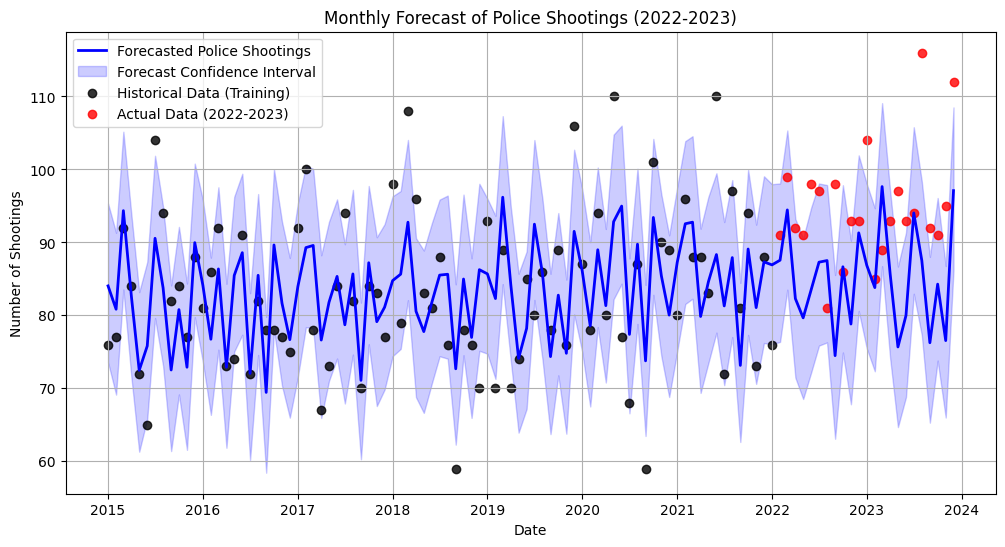

<Figure size 640x480 with 0 Axes>

In [17]:
from prophet import Prophet
import matplotlib.pyplot as plt
import os

# Prepare data for Prophet
prophet_data = merged_data_corrected.rename(columns={'date': 'ds', 'shooting_count': 'y', 'crime_rates': 'crime_rate', 'unemployment': 'unemployment'})
prophet_data = prophet_data[['ds', 'y', 'crime_rate', 'unemployment']].dropna()

# Filter data to include only police shooting data up to January 2022
train_data = prophet_data[prophet_data['ds'] <= '2022-01']

# Initialize the Prophet model
model = Prophet()

# Add crime rates as a regressor
model.add_regressor('crime_rate')
model.add_regressor('unemployment')

# Fit the model
model.fit(train_data)

# Create a future dataframe to predict police shootings for 2022 and 2023
future = prophet_data[['ds', 'crime_rate', 'unemployment']].copy()
future = future[(future['ds'] > '2022-01') & (future['ds'] <= '2023-12')]

# Forecast
forecast = model.predict(future)

# Combine historical data and forecast
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Select forecast columns
# draw forcast line for the trained  data also
forecast_train = model.predict(train_data)

forecast = pd.concat([forecast_train[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], forecast])


# Filter actual data for 2022 and 2023
actual_data = prophet_data[(prophet_data['ds'] > '2022-01') & (prophet_data['ds'] <= '2023-12')]

# Plot historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Police Shootings', color='blue', linewidth=2)
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='blue',
    alpha=0.2,
    label='Forecast Confidence Interval'
)
plt.scatter(train_data['ds'], train_data['y'], color='black', label='Historical Data (Training)', alpha=0.8)
plt.scatter(actual_data['ds'], actual_data['y'], color='red', label='Actual Data (2022-2023)', alpha=0.8)
plt.title('Monthly Forecast of Police Shootings (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Shootings')
plt.grid()
plt.legend()
plt.show()

# Save the plot
if not os.path.exists('time_series'):
    os.makedirs('time_series')
plt.savefig('time_series/forecast_crime.png')


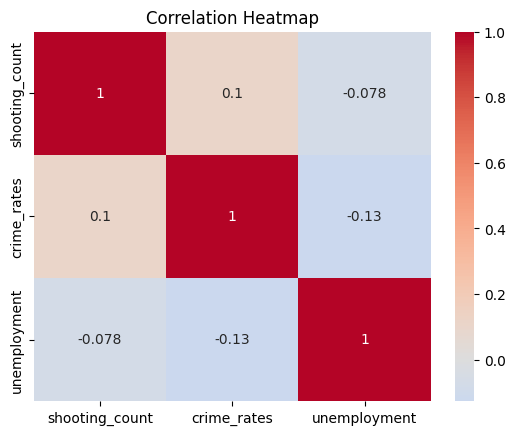

<Figure size 640x480 with 0 Axes>

In [18]:
# plot correlation between crime rates and police shootings

# Calculate the correlation between crime rates and police shootings and unemployment



# Display the correlation heat map
# drop date column
merged_data_corrected = merged_data_corrected.drop(columns=['date'])
sns.heatmap(merged_data_corrected.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# save the image in time_series folder
if not os.path.exists('time_series'):
    os.makedirs('time_series')
plt.savefig('time_series/correlation_heatmap.png')

